# Prerequisites

1. PostGIS

2. GeoPandas

# PostGres Database Structure

**1. Database Name : ** RedCarpetup

**2. Tables Used : **

      i) DomesticsConsumers
      
     ii) RetailOutlets
     
    iii) gadm36_ind_1

# Queries used for database 

Database created using : createdb RedCarpetUp

  
Tables created using 

ogr2ogr -f PostgreSQL "PG:dbname=RedCarpetUp" gadm36_IND.gpkg

psql -d RedCarpetUp -c "create table DomesticConsumers(State TEXT,IOCL INT,HPCL INT,BPCL INT,TOTAL INT,TOTAL2014 INT)"

psql -d RedCarpetUp -c "\COPY DomesticConsumers FROM 'datafile.csv' delimiter ',' csv header;"


In [63]:
import psycopg2
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Connection with postgis using psycopg2

In [64]:
con = psycopg2.connect(database="RedCarpetUp")

## Reading State_wise distribution table from database

In [65]:
sql = "SELECT * FROM gadm36_ind_1"

In [66]:
states = geopandas.read_postgis(sql,con,geom_col="wkb_geometry");states.head()

,fid,gid_0,name_0,gid_1,name_1,varname_1,nl_name_1,type_1,engtype_1,cc_1,hasc_1,wkb_geometry
0,1,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78..."
1,2,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422..."
2,3,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"(POLYGON ((94.21111298 27.61084175, 94.2135086..."
3,4,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"(POLYGON ((89.83874512 25.96647453, 89.8381424..."
4,5,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2..."


### Rendering maps

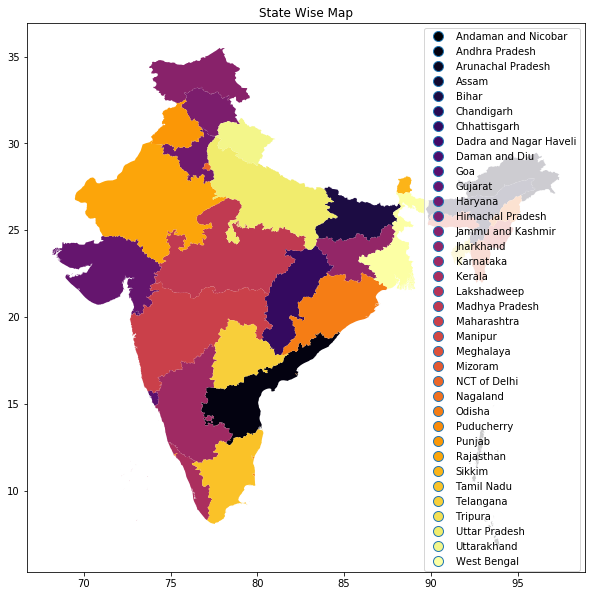

In [67]:
states.plot(column="name_1",cmap='inferno',legend=True,figsize=(10,12))
plt.title('State Wise Map')
plt.show()

# "State-wise And Company-wise LPG Domestic Consumers" and "State-wise And Company-wise Retail Outlet" as an overlay on this map

## Reading DomesticConsumers Table

In [68]:
sql1 = "SELECT * FROM DomesticConsumers;"

In [69]:
DomesticConsumers=pd.read_sql(sql1,con);DomesticConsumers.head()

,state,iocl,hpcl,bpcl,total,totalf
0,Andaman & Nicobar,63,0,0,63,59
1,Andhra Pradesh,5799,6635,3166,15600,14061
2,Arunachal Pradesh,183,0,1,183,164
3,Assam,2261,56,131,2448,2275
4,Bihar,2351,725,749,3825,3286


### Lets join DomesticConsumers with states table in order to add geometry to it 

In [70]:
#consumers= states.set_index('name_1').join(DomesticConsumers.set_index('state'))
consumers=states.join(DomesticConsumers)

In [71]:
consumers.head()

,fid,gid_0,name_0,gid_1,name_1,varname_1,nl_name_1,type_1,engtype_1,cc_1,hasc_1,wkb_geometry,state,iocl,hpcl,bpcl,total,totalf
0,1,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78...",Andaman & Nicobar,63.0,0.0,0.0,63.0,59.0
1,2,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422...",Andhra Pradesh,5799.0,6635.0,3166.0,15600.0,14061.0
2,3,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"(POLYGON ((94.21111298 27.61084175, 94.2135086...",Arunachal Pradesh,183.0,0.0,1.0,183.0,164.0
3,4,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"(POLYGON ((89.83874512 25.96647453, 89.8381424...",Assam,2261.0,56.0,131.0,2448.0,2275.0
4,5,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2...",Bihar,2351.0,725.0,749.0,3825.0,3286.0


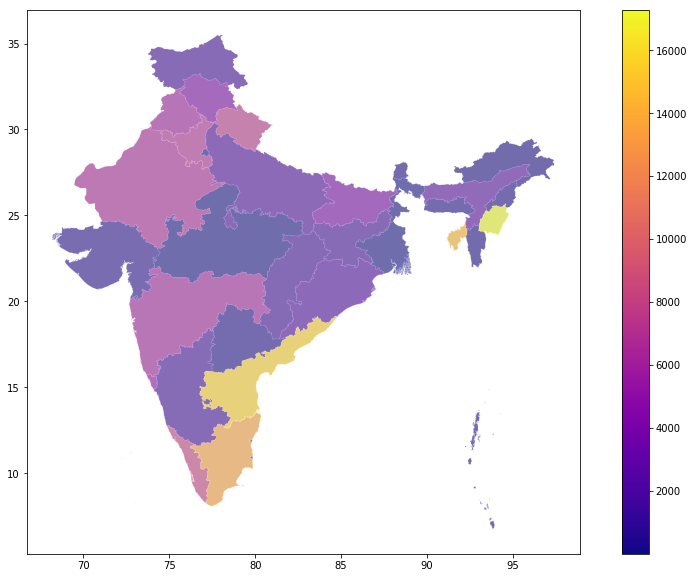

In [72]:
# Save the first layer as ax
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10),legend=True)
# Pass ax=ax to the second layer
consumers.plot(markersize=10, alpha=0.5,ax=ax,column='total', cmap='plasma',figsize=(10,12),legend=True)

### Company Wise LPG Domestic Consumers

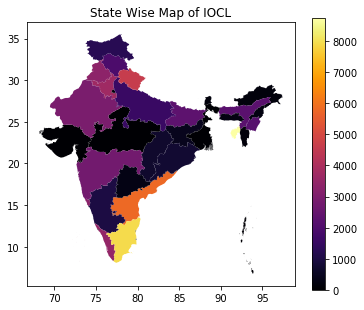

In [73]:
consumers.plot(column="iocl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of IOCL')
plt.show()

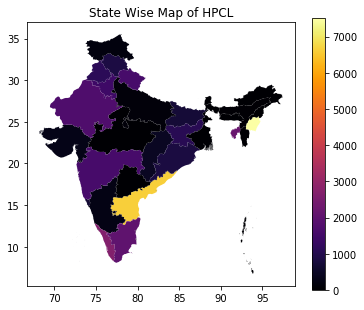

In [74]:
consumers.plot(column="hpcl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of HPCL')
plt.show()

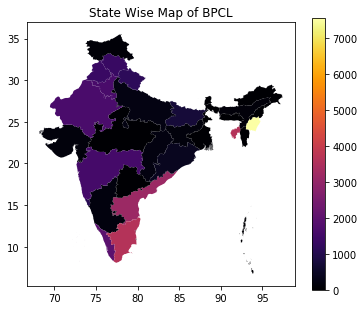

In [75]:
consumers.plot(column="bpcl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of BPCL')
plt.show()

## Reading RetailOutlets Table 

In [76]:
sql2 = "SELECT * FROM RetailOutlets;"

In [77]:
RetailOutlets=pd.read_sql(sql2,con);RetailOutlets.head()

,state,iocl,hpcl,bpcl,total,totalf
0,Andaman and Nicobar,9,0,0,9,9
1,Andhra Pradesh,1651,1173,970,3794,3374
2,Arunachal Pradesh,48,0,1,49,48
3,Assam,474,72,43,589,561
4,Bihar,1074,331,466,1871,1653


### Lets join RetailOutlets with states table in order to add geometry to it 

In [78]:
#consumers= states.set_index('name_1').join(RetailOutlets.set_index('state')).reset_index()
outlet=states.join(RetailOutlets)
outlet.head()

,fid,gid_0,name_0,gid_1,name_1,varname_1,nl_name_1,type_1,engtype_1,cc_1,hasc_1,wkb_geometry,state,iocl,hpcl,bpcl,total,totalf
0,1,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78...",Andaman and Nicobar,9.0,0.0,0.0,9.0,9.0
1,2,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422...",Andhra Pradesh,1651.0,1173.0,970.0,3794.0,3374.0
2,3,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"(POLYGON ((94.21111298 27.61084175, 94.2135086...",Arunachal Pradesh,48.0,0.0,1.0,49.0,48.0
3,4,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"(POLYGON ((89.83874512 25.96647453, 89.8381424...",Assam,474.0,72.0,43.0,589.0,561.0
4,5,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2...",Bihar,1074.0,331.0,466.0,1871.0,1653.0


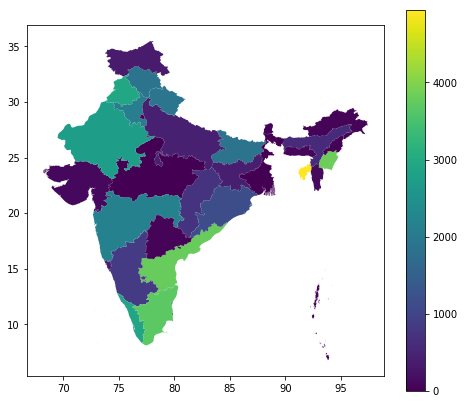

In [79]:
outlet.plot(column='total', legend=True,figsize=(8,7))
plt.show()

### Company Wise LPG Retail Outlets


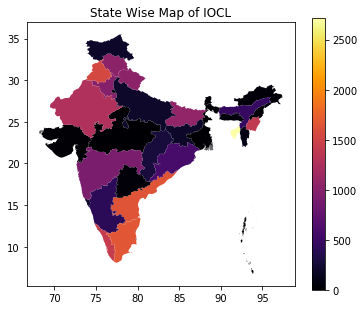

In [80]:
outlet.plot(column="iocl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of IOCL')
plt.show()

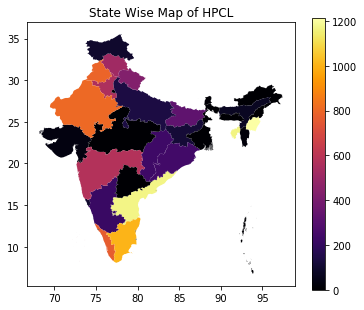

In [81]:
outlet.plot(column="hpcl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of HPCL')
plt.show()

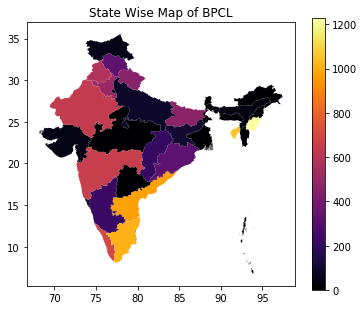

In [82]:
outlet.plot(column="bpcl",cmap='inferno',legend=True,figsize=(6,5))
plt.title('State Wise Map of BPCL')
plt.show()